### 1. Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, matthews_corrcoef
from imblearn.over_sampling import SMOTE

import os
import joblib
import warnings

In [2]:
# Ignore warnings in the notebook
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/heart_disease_uci.csv")

### 2. EDA

In [4]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [6]:
df = df.drop(['id', 'dataset'], axis=1)

In [7]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [9]:
df.shape

(920, 14)

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [11]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(2)

In [13]:
df.dtypes

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

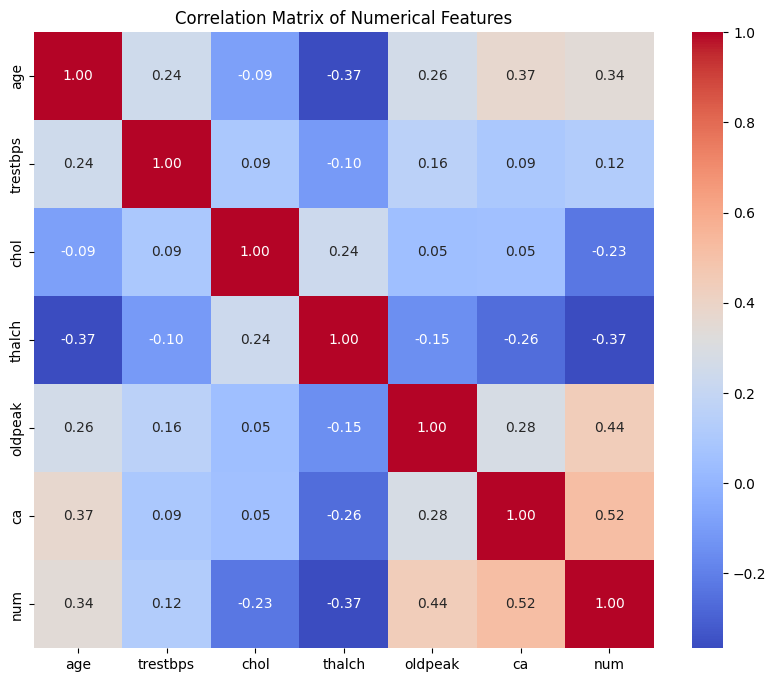

In [14]:
# Correlation matrix using numerical features only
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()  
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [15]:
# Target variable distribution - Class imbalance check 
df['num'].value_counts(normalize=True)

num
0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: proportion, dtype: float64

In [16]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [17]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

categorical_cols,numerical_cols

(Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object'),
 Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object'))

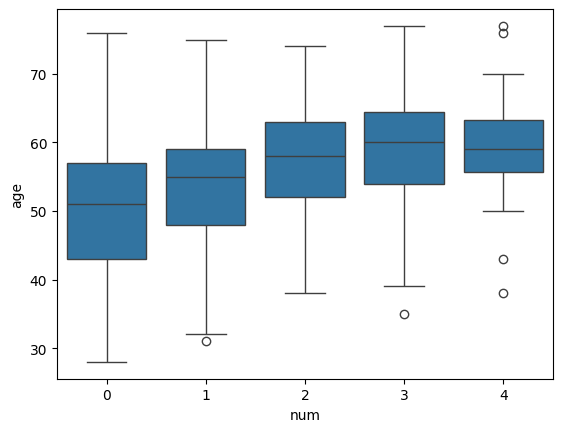

In [18]:
sns.boxplot(x='num', y='age', data=df)
plt.show()

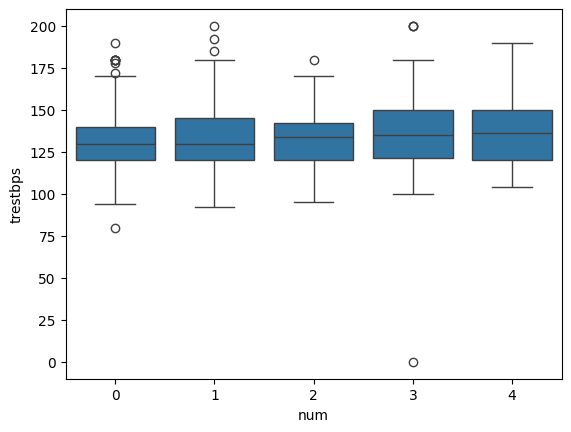

In [19]:
sns.boxplot(x='num', y='trestbps', data=df)
plt.show()

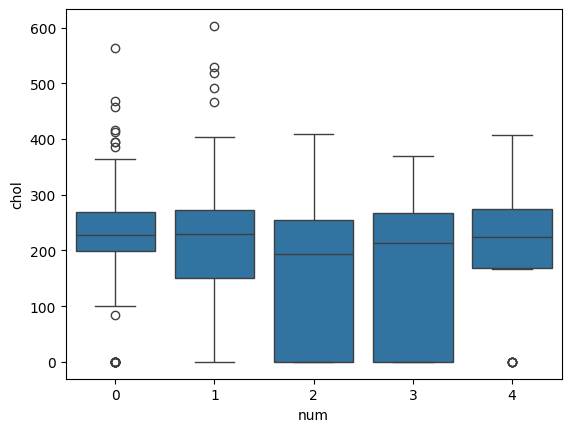

In [20]:
sns.boxplot(x='num', y='chol', data=df)
plt.show()

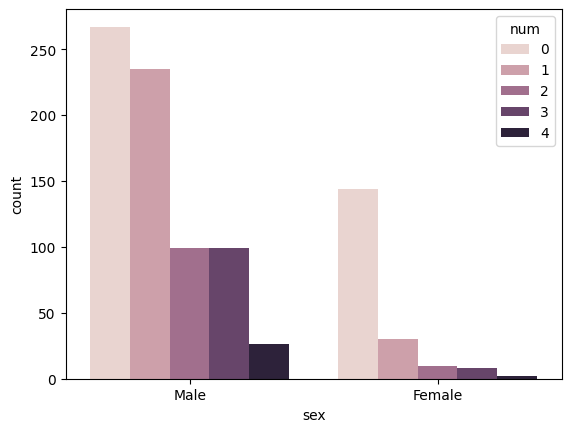

In [21]:
sns.countplot(x='sex', hue='num', data=df)
plt.show()

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

### 3. Data Preprocessing

In [23]:
# 1. Separate features and target
X = df.drop('num', axis=1)
y = df['num']

# 2. Handle missing values
for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        X[col].fillna(X[col].median(), inplace=True)
    else:
        X[col].fillna(X[col].mode()[0], inplace=True)

# 3. Handle outliers (remove rows)
numerical_cols = X.select_dtypes(include=['int64','float64']).columns
for col in numerical_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (X[col] >= lower) & (X[col] <= upper)
    X = X[mask]
    y = y[mask]  # keep X and y aligned

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Preprocessing pipeline (encoding, scaling)
categorical_cols = X_train.select_dtypes(include='object').columns
numerical_cols = X_train.select_dtypes(include=['int64','float64']).columns
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
    ])

In [24]:
# # --- Enhanced Feature Engineering ---
# # 1. Feature Creation: Age bins, interaction terms
# X['age_bin'] = pd.cut(X['age'], bins=[0, 40, 55, 100], labels=['young', 'middle', 'old'])
# if 'chol' in X.columns and 'age' in X.columns:
#     X['chol_per_age'] = X['chol'] / (X['age'] + 1)

# # 2. Outlier Capping (instead of removal)
# for col in numerical_cols:
#     Q1 = X[col].quantile(0.25)
#     Q3 = X[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     X[col] = np.where(X[col] < lower, lower, np.where(X[col] > upper, upper, X[col]))

# # 3. Feature Selection: Remove low-variance and highly correlated features
# def remove_highly_correlated_features(df, threshold=0.9):
#     corr_matrix = df.corr().abs()
#     upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#     to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
#     return df.drop(columns=to_drop)

# X = remove_highly_correlated_features(X)

# # 4. (Optional) Address class imbalance with SMOTE if needed
# try:
#     smote = SMOTE(random_state=42)
#     X, y = smote.fit_resample(X, y)
# except ImportError:
#     print('imblearn not installed, skipping SMOTE')


In [25]:
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

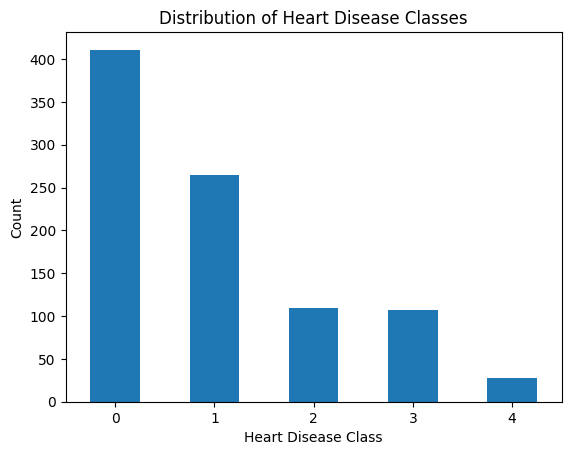

In [26]:
# Target variable is multiclass classsification problem.
# Class 0: No heart disease, Class 1: Mild heart disease, Class 2: Moderate heart disease
# Class 3: Severe heart disease, Class 4: Critical heart disease
df['num'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Heart Disease Class')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Classes')
plt.xticks(rotation=0)
plt.show()

In [27]:
# # Handling NaN values
# # Check for NaNs
# display(X.isnull().sum())

# # Fill NaNs (imputation)
# # For numerical columns, filling with median; for categorical, filling with mode
# for col in X.columns:
#     if X[col].dtype in ['float64', 'int64']:
#         X[col].fillna(X[col].median(), inplace=True)
#     else:
#         X[col].fillna(X[col].mode()[0], inplace=True)

# # After imputation, check for NaNs again to confirm all missing values are handled
# display(X.isnull().sum())

# # Handling outliers (using IQR method for numerical columns)
# for col in numerical_cols:
#     Q1 = X[col].quantile(0.25)
#     Q3 = X[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     # Option 1: Remove outliers
#     X = X[(X[col] >= lower) & (X[col] <= upper)]
#     # Option 2: Cap outliers 
#     # X[col] = np.where(X[col] < lower, lower, np.where(X[col] > upper, upper, X[col]))

# display(X.describe())

In [28]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal
7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal


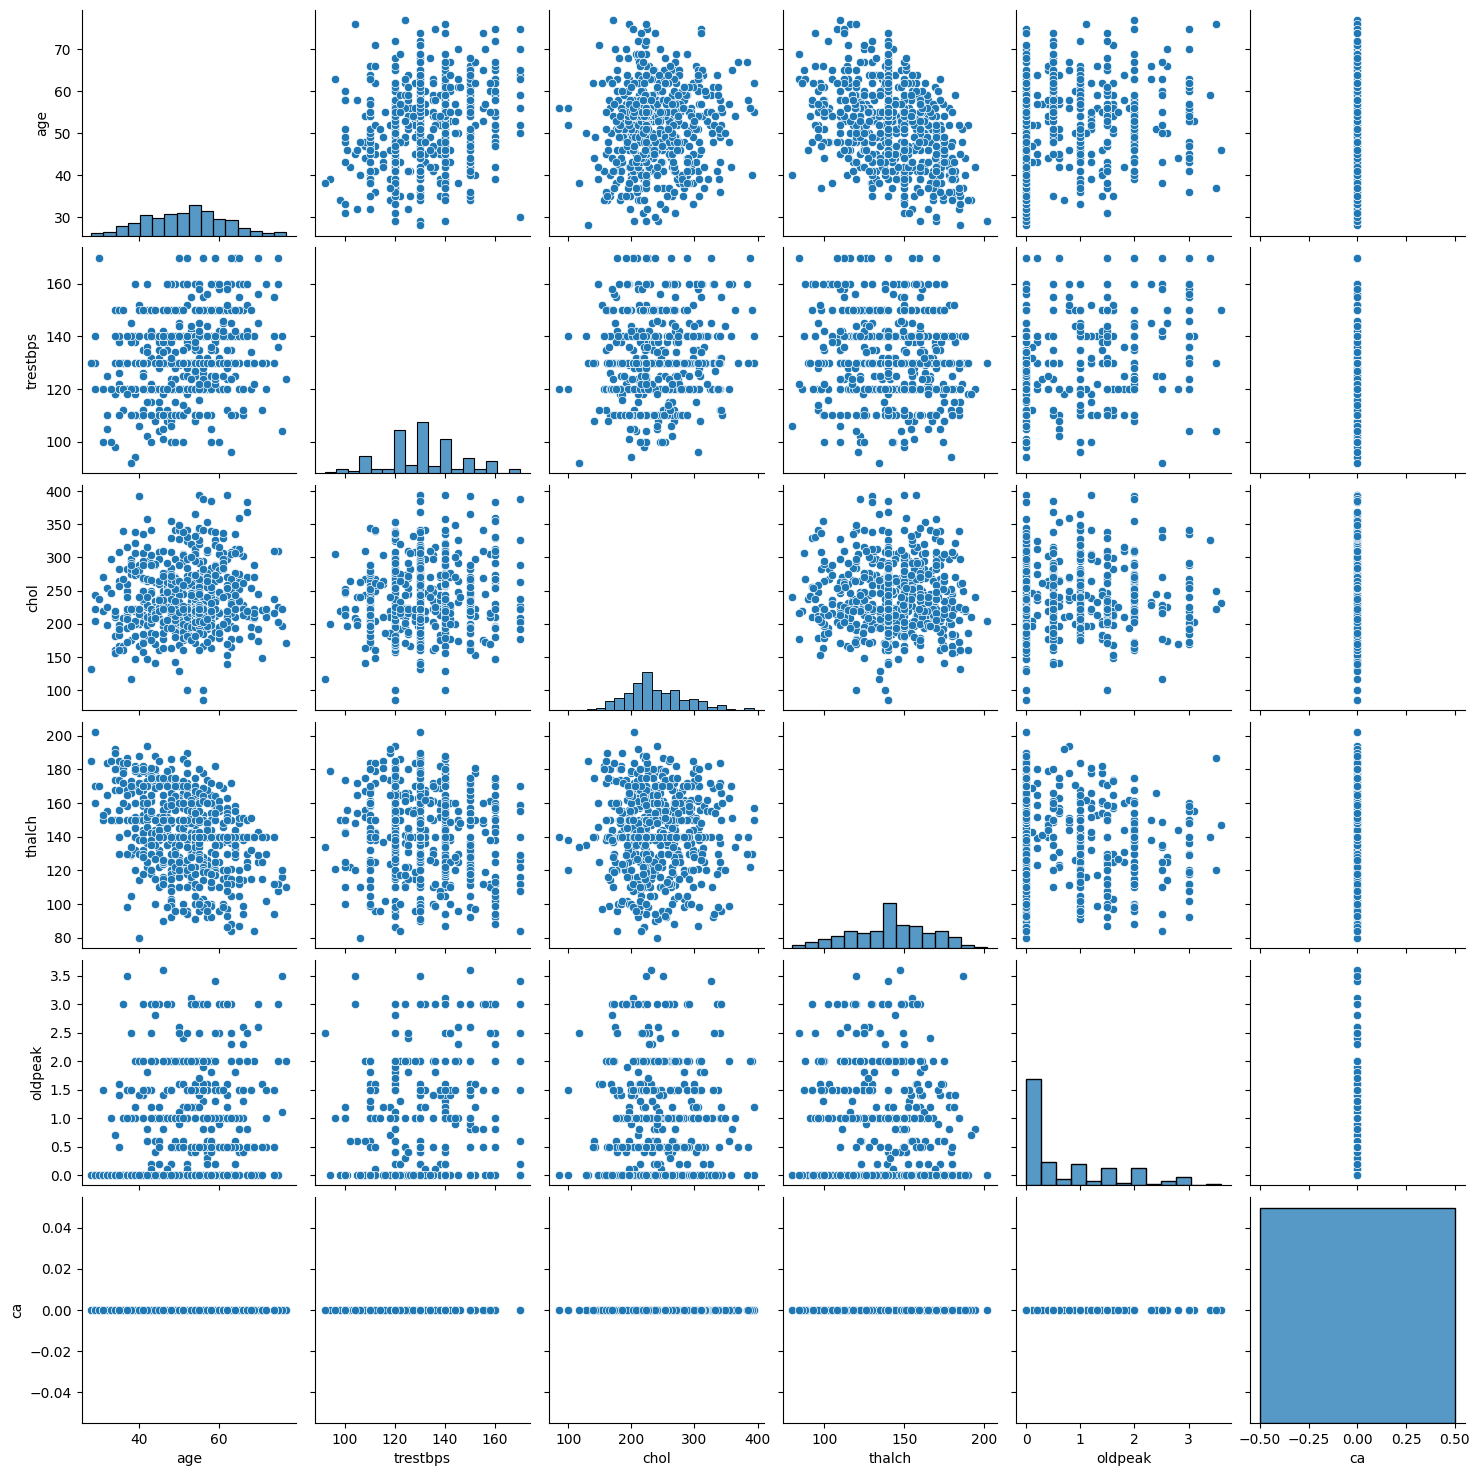

In [29]:
sns.pairplot(X[numerical_cols])
plt.show()

In [30]:
# sns.pairplot(X[categorical_cols])
# plt.show()

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
99,48,Male,asymptomatic,122.0,222.0,False,lv hypertrophy,186.0,False,0.0,upsloping,0.0,normal
726,65,Male,asymptomatic,150.0,236.0,True,st-t abnormality,105.0,True,0.0,flat,0.0,normal
86,47,Male,non-anginal,138.0,257.0,False,lv hypertrophy,156.0,False,0.0,upsloping,0.0,normal
773,56,Male,atypical angina,124.0,224.0,True,normal,161.0,False,2.0,flat,0.0,normal
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal


In [33]:
X_train.shape

(471, 13)

In [34]:
# Fitting the preprocessor on the training data and transform both training and test data 
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [35]:
X_train_processed.shape

(471, 16)

In [36]:
pd.DataFrame(X_train_processed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.381427,-0.631203,-0.363112,1.841819,-0.800968,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.399383,1.191105,-0.083364,-1.508867,-0.800968,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.486181,0.410116,0.336258,0.600824,-0.800968,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.456601,-0.501038,-0.323148,0.807657,1.413625,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.456601,-0.761367,-0.083364,1.510887,0.084869,0.0


In [37]:
X_test_processed.shape

(118, 16)

### 4. Model Building

In [38]:
# Multiclass AUC and MCC calculation
def multiclass_metrics(y_true, y_pred, y_prob):
    # Macro-average AUC (One-vs-Rest)
    try:
        auc_macro = roc_auc_score(y_true, y_prob, multi_class='ovr', average='macro')
    except Exception as e:
        auc_macro = f"AUC error: {e}"
    # Multiclass MCC
    mcc = matthews_corrcoef(y_true, y_pred)
    print(f"Multiclass AUC (macro): {auc_macro}")
    print(f"Multiclass MCC: {mcc:.4f}")

In [39]:
# Common metrics calculation
def calculate_metrics(y_true, y_pred, y_prob=None):
    # Accuracy
    accuracy = np.sum(y_true == y_pred) / len(y_true)

    # Precision, Recall, F1 ( average for multiclass)
    classes = np.unique(y_true)
    precisions, recalls, f1s = [], [], []
    for cls in classes:
        tp = np.sum((y_pred == cls) & (y_true == cls))
        fp = np.sum((y_pred == cls) & (y_true != cls))
        fn = np.sum((y_pred != cls) & (y_true == cls))
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
    precision_macro = np.mean(precisions)
    recall_macro = np.mean(recalls)
    f1_macro = np.mean(f1s)

    # MCC (Matthews Correlation Coefficient)
    mcc = matthews_corrcoef(y_true, y_pred)

   
    print(f"Accuracy: {accuracy:.4f}")

    # AUC Score
    auc = None
    if y_prob is not None:
        try:
            auc_score = roc_auc_score(y_true, y_prob, multi_class='ovr', average='macro')
            print(f"Multiclass AUC Score (macro): {auc_score:.4f}")
        except Exception as e:
            print(f"Multiclass AUC Score error: {e}")

    print(f"Precision (macro): {precision_macro:.4f}")
    print(f"Recall (macro): {recall_macro:.4f}")
    print(f"F1 Score (macro): {f1_macro:.4f}")
    print(f"MCC Score: {mcc:.4f}")

    return accuracy, auc_score, precision_macro, recall_macro, f1_macro, mcc

##### 4.1 Logistic Regression Model

In [40]:
# Create pipeline with preprocessor and logistic regression
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Fit the pipeline on training data and predict on test data
logreg_pipeline.fit(X_train, y_train)
y_pred = logreg_pipeline.predict(X_test)
y_prob = logreg_pipeline.predict_proba(X_test)

acc_lr, auc_lr, precision_lr, recall_lr, f1_lr, mcc_lr = calculate_metrics(y_test, y_pred, y_prob)   

Accuracy: 0.6610
Multiclass AUC Score (macro): 0.8144
Precision (macro): 0.3245
Recall (macro): 0.3184
F1 Score (macro): 0.3174
MCC Score: 0.3434


##### 4.2 Decision Tree Classifier Model

In [41]:
# Create pipeline with preprocessor and decision tree
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline on training data and predict on test data
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)
y_prob_dt = dt_pipeline.predict_proba(X_test)


acc_dt, auc_dt, precision_dt, recall_dt, f1_dt, mcc_dt = calculate_metrics(y_test, y_pred_dt, y_prob_dt)

Accuracy: 0.4746
Multiclass AUC Score (macro): 0.5487
Precision (macro): 0.2409
Recall (macro): 0.2555
F1 Score (macro): 0.2397
MCC Score: 0.1555


##### 4.3 K-Nearest Neighbor Classifier

In [42]:
# Create pipeline with preprocessor and KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

# Fit the pipeline on training data and predict on test data
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)
y_prob_knn = knn_pipeline.predict_proba(X_test)

acc_knn, auc_knn, precision_knn, recall_knn, f1_knn, mcc_knn = calculate_metrics(y_test, y_pred_knn, y_prob_knn)

Accuracy: 0.6610
Multiclass AUC Score (macro): 0.7100
Precision (macro): 0.2690
Recall (macro): 0.2907
F1 Score (macro): 0.2794
MCC Score: 0.3726


##### 4.4 Naive Bayes Classifier (Gaussian)

In [43]:
# Create pipeline with preprocessor and Gaussian Naive Bayes
gnb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('gnb', GaussianNB())
])

# Fit the pipeline on training data and predict on test data
gnb_pipeline.fit(X_train, y_train)
y_pred_gnb = gnb_pipeline.predict(X_test)
y_prob_gnb = gnb_pipeline.predict_proba(X_test)

acc_gnb, auc_gnb, precision_gnb, recall_gnb, f1_gnb, mcc_gnb = calculate_metrics(y_test, y_pred_gnb, y_prob_gnb)

Accuracy: 0.3475
Multiclass AUC Score (macro): 0.6417
Precision (macro): 0.2271
Recall (macro): 0.2457
F1 Score (macro): 0.1922
MCC Score: 0.1905


##### 4.5 Ensemble Model - Random Forest

In [44]:
# Create pipeline with preprocessor and Random Forest Classifier
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on training data and predict on test data
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)

acc_rf, auc_rf, precision_rf, recall_rf, f1_rf, mcc_rf = calculate_metrics(y_test, y_pred_rf, y_prob_rf)

Accuracy: 0.6186
Multiclass AUC Score (macro): 0.7516
Precision (macro): 0.2441
Recall (macro): 0.2629
F1 Score (macro): 0.2531
MCC Score: 0.2900


##### 4.6 Ensemble Model - XGBoost

In [45]:
# Create pipeline with preprocessor and XGBoost Classifier
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Fit the pipeline on training data and predict on test data
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
y_prob_xgb = xgb_pipeline.predict_proba(X_test)

acc_xgb, auc_xgb, precision_xgb, recall_xgb, f1_xgb, mcc_xgb = calculate_metrics(y_test, y_pred_xgb, y_prob_xgb)

Accuracy: 0.6017
Multiclass AUC Score (macro): 0.8130
Precision (macro): 0.2444
Recall (macro): 0.2605
F1 Score (macro): 0.2521
MCC Score: 0.2774


##### 5. Model Comparison

In [46]:
comparison_models = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "KNN",
        "Naive Bayes",
        "Random Forest",
        "XGBoost"
    ],
    "Accuracy": [
        acc_lr,
        acc_dt,
        acc_knn,
        acc_gnb,
        acc_rf,
        acc_xgb
    ],
    "AUC Score": [
        auc_lr,
        auc_dt,
        auc_knn,
        auc_gnb,
        auc_rf,
        auc_xgb
    ],
    "Precision": [
        precision_lr,
        precision_dt,
        precision_knn,
        precision_gnb,
        precision_rf,
        precision_xgb
    ],
    "Recall": [
        recall_lr,
        recall_dt,
        recall_knn,
        recall_gnb,
        recall_rf,
        recall_xgb
    ],
    "F1 Score": [
        f1_lr,
        f1_dt,
        f1_knn,
        f1_gnb,
        f1_rf,
        f1_xgb
    ],
    "MCC Score": [
        mcc_lr,
        mcc_dt,
        mcc_knn,
        mcc_gnb,
        mcc_rf,
        mcc_xgb
    ]
})


In [47]:
# For visualization in Streamlit app, save the comparison metrics to a CSV file
comparison_models.to_csv("model_metrics.csv", index=False)


In [48]:
# Display the comparison table and make in table format

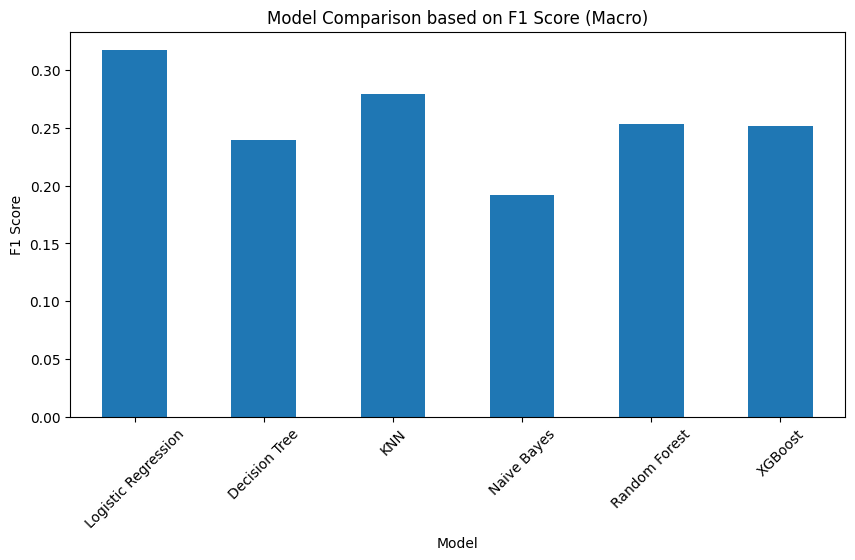

In [49]:
comparison_models.set_index('Model')['F1 Score'].plot(kind='bar', figsize=(10,5))
plt.title("Model Comparison based on F1 Score (Macro)")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.show()

### Comparison Table of Evaluation Metrics for All 6 Models

| Model                | Accuracy | AUC Score | Precision | Recall   | F1 Score | MCC Score |
|----------------------|----------|-----------|-----------|----------|----------|-----------|
| Logistic Regression  | 0.661017 | 0.814375  | 0.324532  | 0.318393 | 0.317383 | 0.343419  |
| Decision Tree        | 0.474576 | 0.548684  | 0.240888  | 0.255536 | 0.239687 | 0.155531  |
| KNN                  | 0.661017 | 0.709951  | 0.268952  | 0.290714 | 0.279403 | 0.372552  |
| Naive Bayes          | 0.347458 | 0.641720  | 0.227121  | 0.245714 | 0.192231 | 0.190497  |
| Random Forest        | 0.618644 | 0.751571  | 0.244118  | 0.262857 | 0.253134 | 0.289985  |
| XGBoost              | 0.601695 | 0.812970  | 0.244444  | 0.260536 | 0.252113 | 0.277401  |

#### Observations:
- **Logistic Regression** and **KNN** achieved the highest accuracy (0.66), with Logistic Regression also having the highest AUC (0.81), indicating strong overall performance.
- **Decision Tree** and **Naive Bayes** performed the worst in terms of accuracy and F1 score, suggesting they are less suitable for this dataset.
- **Random Forest** and **XGBoost** showed balanced performance, with XGBoost having a high AUC (0.81) but slightly lower accuracy than Logistic Regression and KNN.
- Precision, recall, and F1 scores are generally low for all models, indicating class imbalance or difficulty in predicting the positive class.
- **MCC Score** is highest for KNN, suggesting it handles both classes better than others, despite similar accuracy to Logistic Regression.
- Overall, **Logistic Regression** and **KNN** are the best performers, while **Decision Tree** and **Naive Bayes** are the least effective on this dataset.

In [50]:
# # Precision for multi-class classification
# from sklearn.metrics import precision_score

# # Example usage: replace y_test and y_pred with your variables if needed
# # average can be 'macro', 'micro', or 'weighted'
# precision_macro = precision_score(y_test, y_pred, average='macro')
# precision_micro = precision_score(y_test, y_pred, average='micro')
# precision_weighted = precision_score(y_test, y_pred, average='weighted')

# print(f"Macro Precision: {precision_macro:.4f}")
# print(f"Micro Precision: {precision_micro:.4f}")
# print(f"Weighted Precision: {precision_weighted:.4f}")

##### 6. Saving model pipelines

In [51]:
if not os.path.exists('models'):
    os.makedirs('models')

In [52]:
joblib.dump(logreg_pipeline, "models/logistic.pkl")
joblib.dump(dt_pipeline, "models/decision_tree.pkl")
joblib.dump(knn_pipeline, "models/knn.pkl")
joblib.dump(gnb_pipeline, "models/naive_bayes.pkl")
joblib.dump(rf_pipeline, "models/random_forest.pkl")
joblib.dump(xgb_pipeline, "models/xgboost.pkl")


['models/xgboost.pkl']

In [53]:
test_data = X_test.copy()
test_data['target'] = y_test
test_data.to_csv("data/heart_disease_test_data.csv", index=False)

| Model                   | Key Observation                                                                                                                                                                                                         |
| ----------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Logistic Regression** | Achieved the highest AUC score (0.814) and tied highest accuracy (0.661). This indicates strong class separation capability. The moderate MCC suggests balanced predictive power across classes.                        |
| **Decision Tree**       | Showed relatively low accuracy (0.475) and low MCC (0.156), indicating weaker generalization and possible overfitting. Performance was inferior compared to other models.                                               |
| **KNN**                 | Achieved the highest MCC score (0.373) and tied highest accuracy (0.661), indicating better balanced classification performance across all classes. Performed competitively despite lower AUC than Logistic Regression. |
| **Naive Bayes**         | Recorded the lowest accuracy (0.347) and lowest F1 score (0.192), suggesting that the independence assumption did not hold well for this dataset. Overall performance was comparatively weak.                           |
| **Random Forest**       | Delivered stable performance with good AUC (0.752) and moderate accuracy (0.619). However, it did not outperform Logistic Regression or KNN in this dataset.                                                            |
| **XGBoost**             | Achieved high AUC (0.813), nearly equal to Logistic Regression, showing strong ranking ability. However, accuracy and MCC were slightly lower, indicating moderate classification consistency.                          |
